In [30]:
import numpy as np
import pandas as pd

import os
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns


import datetime



# from warnings import filterwarnings
# from mpl_toolkits.mplot3d import Axes3D
# import statsmodels.api as sm
# import missingno as msno

# from sklearn.decomposition import PCA
# from sklearn.preprocessing import scale
# from sklearn.neighbors import LocalOutlierFactor

from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr

# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
# from sklearn.preprocessing import scale
# from sklearn.model_selection import ShuffleSplit, GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn import model_selection
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import BaggingRegressor
# from sklearn.svm import SVR
# from sklearn.preprocessing import StandardScaler
# from sklearn.neural_network import MLPRegressor
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.cross_decomposition import PLSRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import RidgeCV
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import LassoCV
# from sklearn.linear_model import ElasticNet
# from sklearn.linear_model import ElasticNetCV
# from sklearn import linear_model
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# import xgboost as xgb
# from xgboost import XGBRegressor, XGBClassifier
# from lightgbm import LGBMRegressor, LGBMClassifier
# from catboost import CatBoostRegressor, CatBoostClassifier

# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn import tree
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [2]:
folder = '/u/jxu129/machine_learning/heart_attack_regression/data/'

heart = pd.read_csv(os.path.join(folder, 'heart.csv'))
#age - continous
#resting_blood_pressure - continous
#cholestoral - continous
#maximum_heart_rate - continous

#sex - binary
#fasting_blood_pressure - binary
#exng - binary

#chest_pain - 0-3
#resting_ecg - 0-2
#old_peak - 0-6
#slp - 0-2
#caa - 0-4
#thall - 0-3

#output - binary


saturation = pd.read_csv(os.path.join(folder, 'o2Saturation.csv'))

### Heart Data Info

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart.rename(columns={'cp':'chest_pain',
                      'trtbps':'resting_blood_pressure',
                      'chol':'cholestoral',
                      'fbs':'fasting_blood_sugar',
                      'thalachh': 'maximum_heart_rate',
                      'exng': 'exercise_induced_angina'
                     }, inplace=True)

heart.head()

#age - continous
#resting_blood_pressure - continous
#cholestoral - continous
#maximum_heart_rate - continous

#sex - binary
#fasting_blood_pressure - binary
#exng - binary

#chest_pain - 0-3
#resting_ecg - 0-2
#old_peak - 0-6
#slp - 0-2
#caa - 0-4
#thall - 0-3

#output - binary

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,restecg,maximum_heart_rate,exercise_induced_angina,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Saturation Data Info

In [5]:
saturation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
98.6    3585 non-null float64
dtypes: float64(1)
memory usage: 28.1 KB


In [6]:
saturation.rename(columns={'98.6':'saturation_level'
                     }, inplace=True)

saturation.head()

,saturation_level
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


## Data Analysis

### 1. Correlation  

In [7]:
#sns.pairplot(heart)

Text(68.09375, 0.5, 'Heart Data Columns')

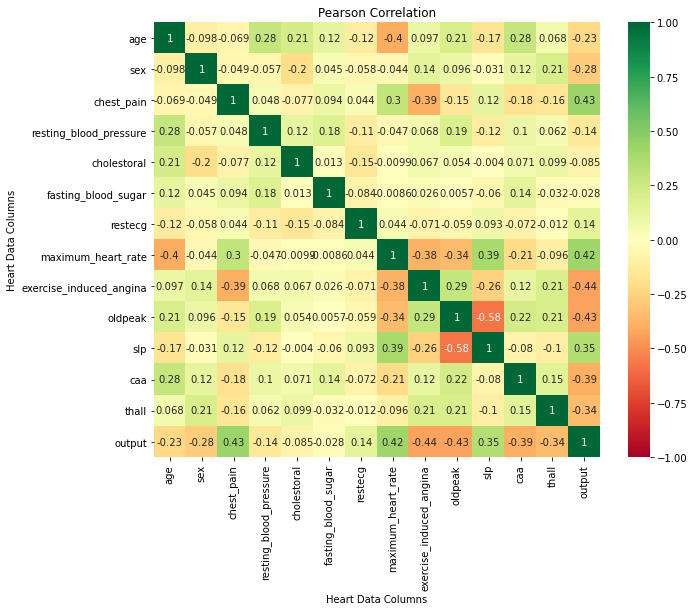

In [8]:
#Pearson Correlation

#Our data
CorrPearson = heart.corr(method="pearson")

#Our chart
figure = plt.figure(figsize=(10,8))
sns.heatmap(CorrPearson,
           annot=True,
           cmap='RdYlGn',
           vmin=-1,
           vmax=+1)

plt.title('Pearson Correlation')
plt.xlabel('Heart Data Columns')
plt.ylabel('Heart Data Columns')

Text(68.09375, 0.5, 'Heart Data Columns')

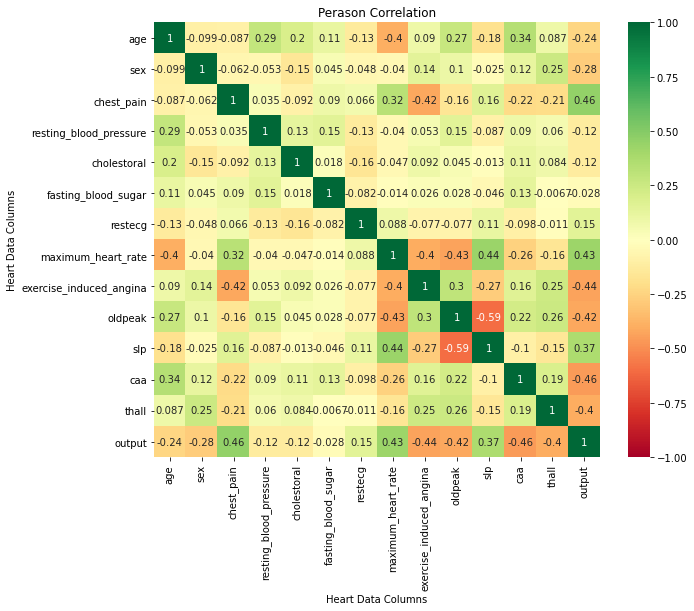

In [10]:
#Spearman Correlation

#Our data
CorrSpearman = heart.corr(method="spearman")

#Our chart
figure = plt.figure(figsize=(10,8))
sns.heatmap(CorrSpearman,
           annot=True,
           cmap='RdYlGn',
           vmin=-1,
           vmax=+1)

plt.title('Perason Correlation')
plt.xlabel('Heart Data Columns')
plt.ylabel('Heart Data Columns')

In [11]:
# #Shapiro - Normality

# for i in heart.columns:
#     print("-----"*10)
#     print("%.3f - %.3f" % shapiro(heart[i]))

### 2. More knowledge on columns 

/u/jxu129/.conda/envs/py368nb/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/u/jxu129/.conda/envs/py368nb/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/u/jxu129/.conda/envs/py368nb/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/u/jxu129/.conda/env

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'caa'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'cholestoral'}>],
       [<AxesSubplot:title={'center':'exercise_induced_angina'}>,
        <AxesSubplot:title={'center':'fasting_blood_sugar'}>,
        <AxesSubplot:title={'center':'maximum_heart_rate'}>,
        <AxesSubplot:title={'center':'oldpeak'}>],
       [<AxesSubplot:title={'center':'output'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'resting_blood_pressure'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'thall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

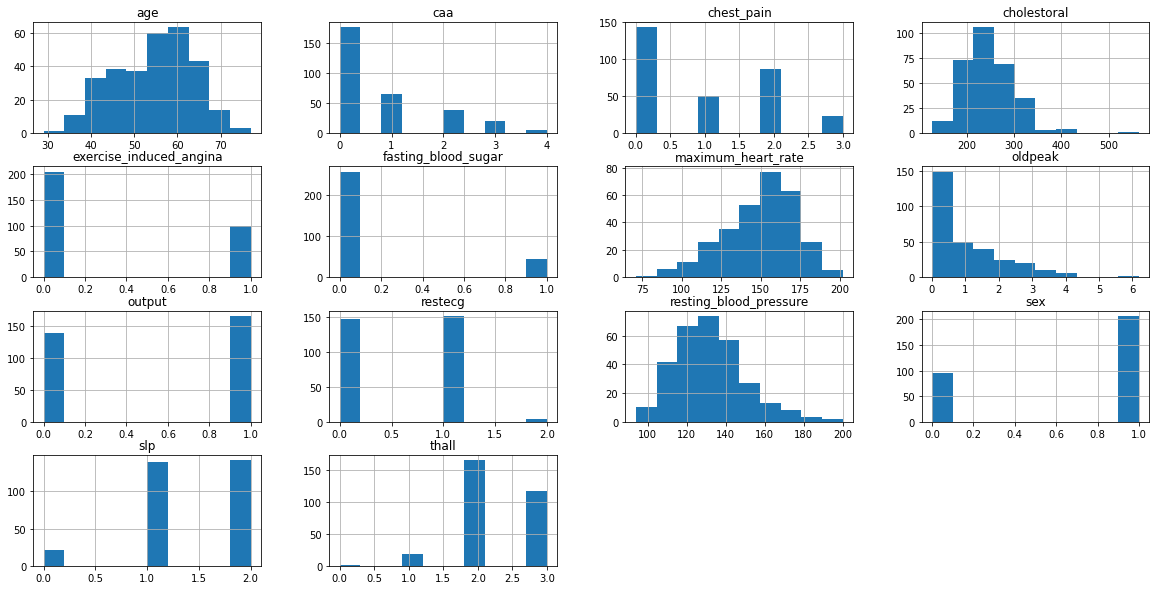

In [12]:
heart.hist(figsize=(20,10))

#Important*   age - continous [boxplot]
#//////////////////resting_blood_pressure - continous [boxplot]
#//////////////////cholestoral - continous [boxplot]
#Important*   maximum_heart_rate - continous [boxplot]

#Important*   sex - binary [count plot]
#//////////////////fasting_blood_sugar - binary [count plot]
#Important*   exng - binary [count plot]

#Important*   chest_pain - 0-3 [count plot]
#//////////////////resting_ecg - 0-2 [count plot]
#Important*   old_peak - 0-6 [count plot]
#Important*   slp - 0-2 [count plot]
#Important*   caa - 0-4 [count plot]
#Important*   thall - 0-3 [count plot]

#output(0: bad, 1: good) - binary

In [41]:
# Boxplot - resting_blood_pressure

# heart['output'] = heart['output'].astype(str)

# figure = plt.figure(figsize=(20,8))
# sns.boxplot(x="resting_blood_pressure",y="output",data=heart)

In [42]:
# Boxplot - cholestoral



# figure = plt.figure(figsize=(20,8))
# sns.boxplot(x="cholestoral",y="output",data=heart)

<Figure size 864x288 with 0 Axes>

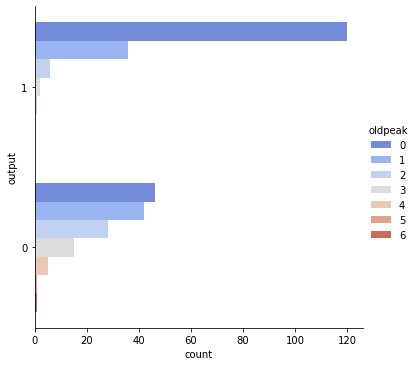

In [50]:
# Count plot - oldpeak


heart['output'] = heart['output'].astype(str)
heart['oldpeak'] = heart['oldpeak'].astype(int)


# Ratio of Up to Date VINs

plt.figure(figsize=(12,4))
plot = sns.catplot(y="output", data=heart, kind='count', palette='coolwarm', orient="h", hue="oldpeak", legend=True) 

<AxesSubplot:xlabel='age', ylabel='output'>

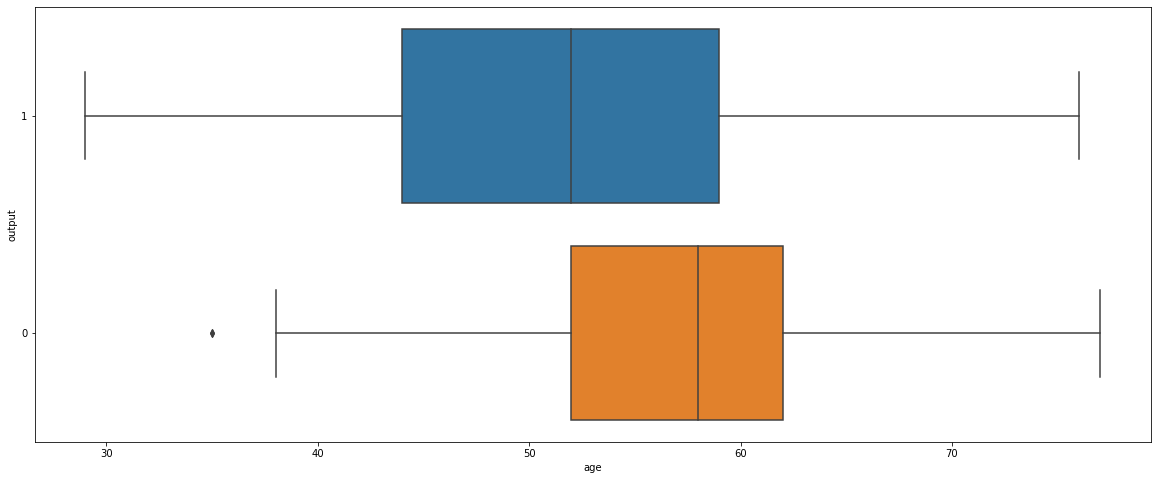

In [14]:
# Boxplot - age

heart['output'] = heart['output'].astype(str)

figure = plt.figure(figsize=(20,8))
sns.boxplot(x="age",y="output",data=heart)

<Figure size 864x288 with 0 Axes>

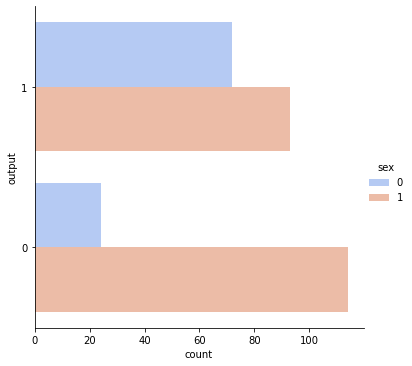

In [43]:
# Count plot - sex

heart['output'] = heart['output'].astype(str)
heart['sex'] = heart['sex'].astype(int)


# Ratio of Up to Date VINs

plt.figure(figsize=(12,4))
plot = sns.catplot(y="output", data=heart, kind='count', palette='coolwarm', orient="h", hue="sex", legend=True) 


<AxesSubplot:xlabel='maximum_heart_rate', ylabel='output'>

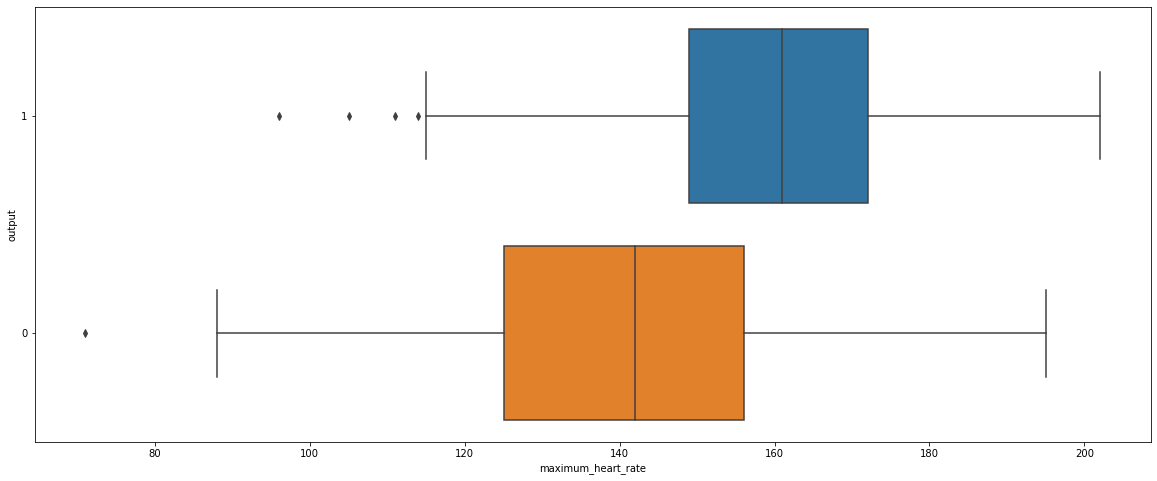

In [44]:
# Boxplot - maximum_heart_rate

heart['output'] = heart['output'].astype(str)

figure = plt.figure(figsize=(20,8))
sns.boxplot(x="maximum_heart_rate",y="output",data=heart)

<Figure size 864x288 with 0 Axes>

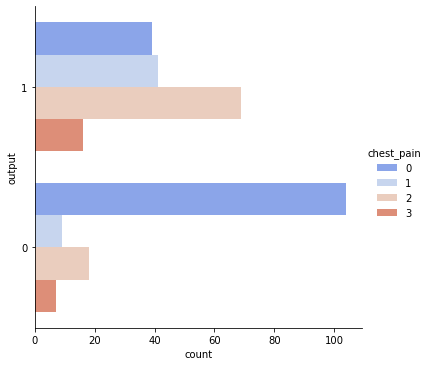

In [51]:
# Count plot - chest_pain


heart['output'] = heart['output'].astype(str)
heart['chest_pain'] = heart['chest_pain'].astype(int)


# Ratio of Up to Date VINs

plt.figure(figsize=(12,4))
plot = sns.catplot(y="output", data=heart, kind='count', palette='coolwarm', orient="h", hue="chest_pain", legend=True) 

In [55]:
# # Count plot - fasting_blood_pressure


# heart['output'] = heart['output'].astype(str)
# heart['fasting_blood_sugar'] = heart['fasting_blood_sugar'].astype(int)


# # Ratio of Up to Date VINs

# plt.figure(figsize=(12,4))
# plot = sns.catplot(y="output", data=heart, kind='count', palette='coolwarm', orient="h", hue="fasting_blood_sugar", legend=True) 

In [58]:
# # Count plot - restecg


# heart['output'] = heart['output'].astype(str)
# heart['restecg'] = heart['restecg'].astype(int)


# # Ratio of Up to Date VINs

# plt.figure(figsize=(12,4))
# plot = sns.catplot(y="output", data=heart, kind='count', palette='coolwarm', orient="h", hue="restecg", legend=True) 

<Figure size 864x288 with 0 Axes>

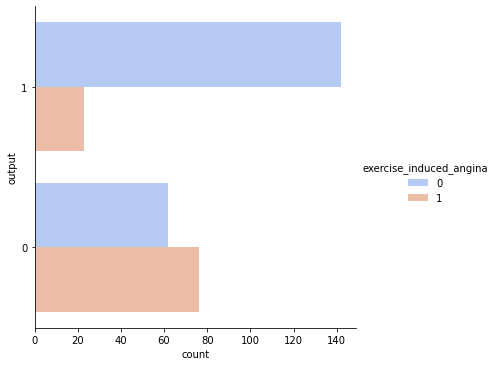

In [60]:
# Count plot - exercise_induced_angina


heart['output'] = heart['output'].astype(str)
heart['exercise_induced_angina'] = heart['exercise_induced_angina'].astype(int)


# Ratio of Up to Date VINs

plt.figure(figsize=(12,4))
plot = sns.catplot(y="output", data=heart, kind='count', palette='coolwarm', orient="h", hue="exercise_induced_angina", legend=True) 

<Figure size 864x288 with 0 Axes>

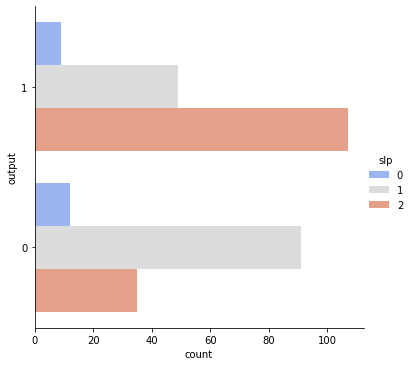

In [61]:
# Count plot - slp


heart['output'] = heart['output'].astype(str)
heart['slp'] = heart['slp'].astype(int)


# Ratio of Up to Date VINs

plt.figure(figsize=(12,4))
plot = sns.catplot(y="output", data=heart, kind='count', palette='coolwarm', orient="h", hue="slp", legend=True) 

<Figure size 864x288 with 0 Axes>

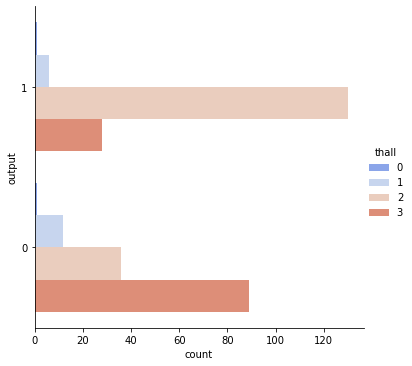

In [62]:
# Count plot - thall


heart['output'] = heart['output'].astype(str)
heart['thall'] = heart['thall'].astype(int)


# Ratio of Up to Date VINs

plt.figure(figsize=(12,4))
plot = sns.catplot(y="output", data=heart, kind='count', palette='coolwarm', orient="h", hue="thall", legend=True) 

<Figure size 864x288 with 0 Axes>

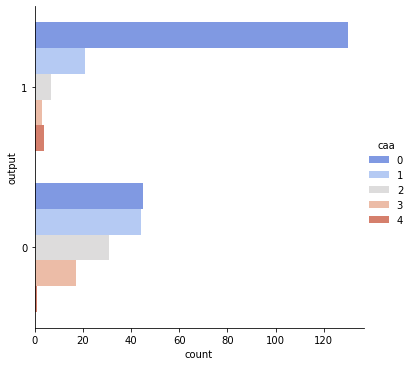

In [66]:
# Count plot - caa


heart['output'] = heart['output'].astype(str)
heart['caa'] = heart['caa'].astype(int)


# Ratio of Up to Date VINs

plt.figure(figsize=(12,4))
plot = sns.catplot(y="output", data=heart, kind='count', palette='coolwarm', orient="h", hue="caa", legend=True) 